# Prediction Using Multiple Linear Regression

### Importing Required Packages and Importing Dataset

In [1]:
#import required packages
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
#import required dataset into pandas dataframe
data = pd.read_csv('E:\Datasets\Real estate.csv')

In [3]:
#printing dataset shape
print("Dataset Shape : ", data.shape)
#printing dataset observations
data.head()

Dataset Shape :  (414, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
#obtaining information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
data.duplicated().any()

False

### Presenting the Data

In [6]:
#dropping columns
columns_to_drop = ['X1 transaction date', 'No']
data = data.drop(columns_to_drop, axis=1)
data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


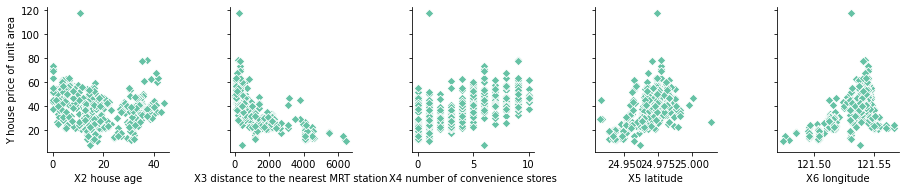

In [7]:
#Feature comparison, of dependent and independent features
sns.pairplot(data, y_vars='Y house price of unit area', 
             x_vars=['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores',
                     'X5 latitude', 'X6 longitude'],
             markers = "D", palette = sns.set_palette("Set2"));

### Splitting the Data

In [8]:
#separate independent and independent variable sets
X = data.drop('Y house price of unit area', axis=1)
y = data.drop(X, axis=1)

print("Columns present as independet variables: ",list(X))
print("Columns present as dependent variable : ",list(y))

Columns present as independet variables:  ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
Columns present as dependent variable :  ['Y house price of unit area']


In [9]:
#Splitting the dataset into test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Fitting the Regression Model and Predict Values

In [10]:
#create the regression object and fit the train set
reg = LinearRegression().fit(X_train, y_train)

#predict the values for test data
price_predict = reg.predict(X_test)

**Results for Multiple Linear Regression Model**

In [11]:
#view results for the model
print("Root Mean Squared Error", mean_squared_error(y_test, price_predict))
print("Mean Absolute Error", mean_absolute_error(y_test, price_predict))
print("Coefficient of Determination", r2_score(y_true=y_test,y_pred=price_predict))

Root Mean Squared Error 72.40244771393738
Mean Absolute Error 6.102581514408364
Coefficient of Determination 0.5486136966367505
